##IE582_Fall21_Homework2

##Task1 - On the use of distance information for UwaveGesture Recognition Task

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, make_scorer
from scipy.spatial import distance_matrix

import time

In [2]:
# X Train
x_train = pd.read_csv("uWaveGestureLibrary_X_TRAIN", header=None, sep=" ",prefix="xt", skipinitialspace=True)
y_train = pd.read_csv("uWaveGestureLibrary_Y_TRAIN", header=None, sep=" ",prefix="yt", skipinitialspace=True)
z_train = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", header=None, sep=" ",prefix="zt", skipinitialspace=True)
classes = x_train.iloc[:, 0]
x_train=x_train.iloc[:,1:]
y_train=y_train.iloc[:,1:]
z_train=z_train.iloc[:,1:]
print(classes)

0      6.0
1      5.0
2      5.0
3      3.0
4      4.0
      ... 
891    3.0
892    1.0
893    2.0
894    7.0
895    5.0
Name: xt0, Length: 896, dtype: float64


In [3]:
# Concatenate the variables for train
concat_all = pd.concat([x_train, y_train, z_train], join="inner", axis=1)
print(concat_all.head())

        xt1       xt2       xt3  ...     zt313     zt314     zt315
0 -0.304243 -0.304243 -0.304243  ...  0.419187  0.400743  0.382298
1  1.627311  1.627311  1.627311  ... -0.464613 -0.476560 -0.488507
2  0.661277  0.661277  0.661277  ... -0.862717 -0.862717 -0.862717
3  0.005185  0.005185  0.005185  ...  0.445503  0.648538  0.851573
4  1.286198  1.286198  1.286198  ...  1.632637  1.750054  1.867472

[5 rows x 945 columns]


In [4]:
# X Test
x_test = pd.read_csv("uWaveGestureLibrary_X_TEST", header=None, sep=" ",prefix="xt", skipinitialspace=True)
y_test = pd.read_csv("uWaveGestureLibrary_Y_TEST", header=None, sep=" ",prefix="yt", skipinitialspace=True)
z_test = pd.read_csv("uWaveGestureLibrary_Z_TEST", header=None, sep=" ",prefix="zt", skipinitialspace=True)
classes_test = x_test.iloc[:, 0]
x_test=x_test.iloc[:,1:]
y_test=y_test.iloc[:,1:]
z_test=z_test.iloc[:,1:]
concat_test = pd.concat([x_test, y_test, z_test], join="inner", axis=1)
print(concat_test.head())

        xt1       xt2       xt3  ...     zt313     zt314     zt315
0  1.557018  1.557018  1.557018  ... -0.309976 -0.302252 -0.294528
1 -0.075096 -0.075096 -0.075096  ...  0.515810  0.515810  0.515810
2  1.509012  1.526296  1.543580  ... -0.124011 -0.068995 -0.013979
3  1.303974  1.303974  1.303974  ...  1.227442  1.283883  1.340324
4  1.298089  1.298089  1.298089  ... -0.667595 -0.663900 -0.660205

[5 rows x 945 columns]


####Part a) Propose two distance measures for computing similarity between two time series. The distance calculation on the concatenated time series implicitly weights the distances of each axis in an equal way. For each distance measure alternative, use the training data to identify the ideal value of k which minimizes the error of a 10-fold cross-validation.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score

When p = 1, this is equivalent to using manhattan_distance (l1). Calculate best k values for manhattan_distance.

Minimum error:  0.04126092384519353 at K = 0


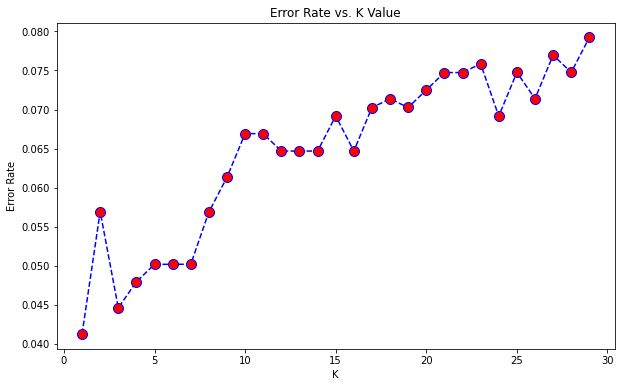

In [54]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=1)
 scores = cross_val_score(knn, concat_all, classes, cv=10)
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate)))

k=1 gives minimum error rate.

When p = 2, this is equivalent to using euclidean_distance(l2). Calculate best k values for euclidean_distance.

Minimum error:- 0.05580524344569293 at K = 2


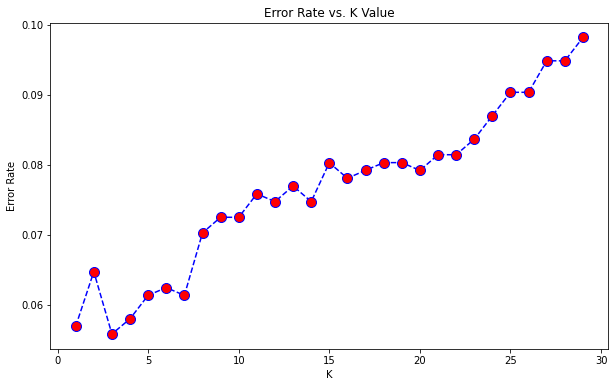

In [7]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=2)
 scores = cross_val_score(knn, concat_all, classes, cv=10)
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

k=3 gives minimum error rate.

**As can be easily seen from the graphs,**

**k=1 gives the least error for Manhattan Distance and k=3 gives the least error for Euclidean Distance** 

####Part b) Using the value of k (identified for each distance measure) in part (a) and evaluate your final performance on the test data and present your results in a (8-by-8) confusion matrix, showing the counts for actual and predicted labels. In addition, quote the runtime and accuracy for your results.

In [8]:
#Run time performance
start = time.time()
knn=KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(concat_all, classes)
y_pred_l1 = knn.predict(concat_test)
end = time.time()
print("Runtime For KNN with L1-norm: {:.3f} seconds".format(end-start))

start = time.time()
knn=KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(concat_all, classes)
y_pred_l2 = knn.predict(concat_test)
end = time.time()
print("Runtime For KNN with L2-norm: {:.3f} seconds".format(end-start))

Runtime For KNN with L1-norm: 2.559 seconds
Runtime For KNN with L2-norm: 0.393 seconds


In [9]:
# Confusion Matrix For KNN with L1-norm and k=1
print("Confusion Matrix For KNN with L1-norm and k=1")
confusion_matrix_l1 = pd.crosstab(classes_test, y_pred_l1,rownames=['actual'], colnames=['predicted'])
print(confusion_matrix_l1)

Confusion Matrix For KNN with L1-norm and k=1
predicted  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
actual                                           
1.0        430    0    0    2    0    5    0    0
2.0          1  451    0    0    0    0    0    0
3.0          2    0  418    0   16   14    4    0
4.0          3    0    0  392   40   11    0    4
5.0          3    0    9    5  415    1    0    0
6.0          3    0    5   13   16  411    0    1
7.0          0    0    2    0    0    0  445    0
8.0          0    0    0    3    1    0    0  456


In [10]:
#Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(classes_test, y_pred_l1)

0.954215522054718

In [11]:
# Confusion Matrix For KNN with L2-norm and k=3
print("Confusion Matrix For KNN with L2-norm and k=3")
confusion_matrix_l1 = pd.crosstab(classes_test, y_pred_l2,rownames=['actual'], colnames=['predicted'])
print(confusion_matrix_l1)

Confusion Matrix For KNN with L2-norm and k=3
predicted  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
actual                                           
1.0        431    0    0    2    0    4    0    0
2.0          1  449    0    0    0    0    2    0
3.0          2    0  413    0   15   20    4    0
4.0          7    0    0  370   60    6    0    7
5.0          3    0    6    1  422    1    0    0
6.0          6    0    7   15   28  392    1    0
7.0          0    0    1    0    0    0  446    0
8.0          0    0    0    1    1    0    0  458


In [12]:
#Calculate accuracy score
accuracy_score(classes_test, y_pred_l2)

0.9438860971524288

KNN with L1-norm has better accuracy score.

### Part c) The observations from different axes are weighted equally if we compute the distance over each axis and sum them to obtain a final similarity measure. Is this reasonable? 

I think that weighting the distances over different axes to obtain a final similarity measure makes sense for classification. Because the effect of each axis may be different in classes, and scaling it may lead to more accurate results. 


The greater the weight of x and y axes for our dataset, may allow us to obtain more accurate results. Because, acceleration at x and y axes determines the class of the gesture. 

##Task 2 – Linear models on alternative representations of the data

### part a) Train a logistic regression model on the training data and use the model to make a prediction on then test data. Note that you will obtain probabilistic predictions . This will require you to select a threshold since 0.5 as a threshold may not work well under this imbalanced class setting. To make things easier, use the ratio of Class 3 instances in the training data as threshold. Use the learned model to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

In [13]:
# Change target value according to Class 3
class3 = (classes==3)*1
class3_test = (classes_test==3)*1
print(class3)

0      0
1      0
2      0
3      1
4      0
      ..
891    1
892    0
893    0
894    0
895    0
Name: xt0, Length: 896, dtype: int64


In [14]:
# Find the ratio of Class 3 in the training data
ratio_class3 = class3.sum()/len(y_train)
ratio_class3

0.11830357142857142

In [15]:
# Create Logistic Regression model with no penalization.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic_regression = LogisticRegression(penalty='none',max_iter=1000)
logistic_regression.fit(concat_all, class3)

# Get prediction probabilities of the test data and convert them to binary predictions by using the Class3 ratio as threshold.
y_pred_prob = logistic_regression.predict_proba(concat_test)
y_pred_lr_class3 = (y_pred_prob[:,1]>ratio_class3)*1

confusion_matrix(class3_test, y_pred_lr_class3)


array([[2953,  175],
       [ 165,  289]])

In [16]:
#Calculate accuracy score
accuracy_score(class3_test, y_pred_lr_class3)

0.9050809603573423

**Logistic Regresson accuracy score is 0.905**

### part b) An alternative way is to train a logistic regression model with lasso penalties.

In [17]:
 from sklearn.linear_model import LogisticRegressionCV

In [21]:
Cs_values=[0.0001, 0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 100]
lr_lasso_model = LogisticRegressionCV(Cs=Cs_values,penalty='l1', solver='liblinear',cv=10, random_state=0,scoring="neg_log_loss",max_iter=100)
lr_lasso_model.fit(concat_all, class3)
lr_lasso_model.Cs_

array([1.e-04, 1.e-03, 5.e-02, 1.e-02, 5.e-01, 1.e-01, 1.e+00, 5.e+00,
       1.e+01, 1.e+02])

In [22]:
lr_lasso_model.scores_

{1: array([[-0.69314718, -0.69314718, -0.17402984, -0.3697582 , -0.13494107,
         -0.14646614, -0.15223934, -0.29023809, -0.35061402, -0.76248401],
        [-0.69314718, -0.69314718, -0.15827935, -0.36883604, -0.10136423,
         -0.12999414, -0.09884814, -0.21830942, -0.39825898, -1.10466215],
        [-0.69314718, -0.69314718, -0.14550768, -0.36094704, -0.08187426,
         -0.11452   , -0.08337697, -0.18853063, -0.27156497, -0.70614063],
        [-0.69314718, -0.69314718, -0.15945309, -0.37170416, -0.08163378,
         -0.12112409, -0.08412132, -0.16130919, -0.26548123, -0.71715692],
        [-0.69314718, -0.69314718, -0.11402535, -0.36547445, -0.0329871 ,
         -0.07159654, -0.03772586, -0.07235291, -0.13581258, -0.49904564],
        [-0.69314718, -0.69314718, -0.15811361, -0.37078206, -0.14523454,
         -0.13140921, -0.16965782, -0.3161063 , -0.49229863, -1.14450124],
        [-0.69314718, -0.69314718, -0.18372315, -0.38422835, -0.11304807,
         -0.14727437, -0.1086

In [23]:
min_error_index=0
max_value=1+lr_lasso_model.scores_[1][0].mean()
for i in range (0,len(lr_lasso_model.scores_[1])):
  print(1+lr_lasso_model.scores_[1][i].mean())
  if 1+lr_lasso_model.scores_[1][i].mean() > max_value:
    min_error_index = i
    max_value =(1+lr_lasso_model.scores_[1][i].mean())

print("We can find min error at Cs value: "+str(Cs_values[int(min_error_index)]))

0.6232934940695294
0.6035153182458162
0.6661243451221516
0.6651721854765005
0.7284685206699331
0.568560223635874
0.6588370589220326
0.6873853914662776
0.6278641069164214
0.6274024708260957
We can find min error at Cs value: 0.5


**We know that C=1/λ, so best alpha value is 0.5=1/λ  λ=2**

In [24]:
predict_proba_class3=lr_lasso_model.predict_proba(concat_test)
predict_class3=(predict_proba_class3[:,1]>ratio_class3)*1

In [25]:
confusion_matrix_l1 = pd.crosstab(class3_test, predict_class3,rownames=['actual'], colnames=['predicted'])
print(confusion_matrix_l1)

predicted     0    1
actual              
0          2872  256
1            33  421


In [26]:
#Calculate accuracy score
accuracy_score(class3_test, predict_class3)

0.9193188163037409

In [31]:
# regression coefficients
coef_df = pd.DataFrame(lr_lasso_model.coef_.T,columns=['lr_coefficients'],index=concat_all.columns)
nonzero_coef_df = coef_df[coef_df['lr_coefficients']!=0]
print('Number of features: ',coef_df.shape[0])
print('Number of features with nonzero coefficient: ',nonzero_coef_df.shape[0])

Number of features:  945
Number of features with nonzero coefficient:  71


**71 of 945 features are selected when Lasso penalties applied. It gives better accuracy than Regular Logistic Regression**

In [33]:
nonzero_coef_df[nonzero_coef_df["lr_coefficients"]>0]

,lr_coefficients
xt127,0.058794
xt128,0.007998
xt208,0.090252
xt235,0.143794
xt236,0.230971
xt237,0.376691
xt238,0.187992
xt249,0.235626
xt258,0.378231
xt259,0.168722


20 of 37 features that have a positive impact are in X-axis. 
This is actually not surprising because when we look at the class 3 gesture, it does most of its movement on the x axis. Therefore, we mostly need x-axis coordinate to define class3 gesture. 

But the value of y 166 (0.827252) has the most significant effect. Although the reason for this is not very remarkable, it can be an important value to distinguish it from other classes, since one of the 2 classes(class 3 and class 4) that did not change in the y-axis during that time period is class3.

### part c) An alternative way to represent the feature matrix on a new space to introduce nonlinear relations is to use distance matrix as a feature matrix. 

In [36]:
from sklearn.metrics import pairwise_distances

# Create copies of original datasets
X_train_copy = concat_all.copy()
X_test_copy = concat_test.copy()

# Create Distance Matrices
distance_train = pd.DataFrame(pairwise_distances(X_train_copy,metric='euclidean'),columns=X_train_copy.index,index=X_train_copy.index)
print(distance_train)
distance_test = pd.DataFrame(pairwise_distances(X_test_copy,X_train_copy,metric='euclidean'),columns=X_train_copy.index,index=X_test_copy.index)
print(distance_test)

           0             1          2    ...        893           894        895
0     0.000000  5.130385e+01  46.492630  ...  43.590523  4.717981e+01  52.290139
1    51.303846  9.536743e-07  26.150617  ...  41.242534  4.326349e+01  24.413671
2    46.492630  2.615062e+01   0.000000  ...  47.869566  5.275303e+01  23.007826
3    50.005572  3.684757e+01  43.114909  ...  36.476096  3.777271e+01  37.739351
4    40.530645  3.271092e+01  34.685574  ...  45.798806  4.443520e+01  39.755263
..         ...           ...        ...  ...        ...           ...        ...
891  34.617316  4.440307e+01  37.879804  ...  45.263191  4.502968e+01  43.743589
892  40.368024  5.465286e+01  49.857533  ...  42.399479  3.974913e+01  49.300711
893  43.590523  4.124253e+01  47.869566  ...   0.000001  3.590154e+01  44.846243
894  47.179806  4.326349e+01  52.753026  ...  35.901542  9.536743e-07  48.547607
895  52.290139  2.441367e+01  23.007826  ...  44.846243  4.854761e+01   0.000000

[896 rows x 896 columns]
  

In [39]:
Cs_values=[0.0001, 0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 100]
lr_lasso_model_2 = LogisticRegressionCV(Cs=Cs_values,penalty='l1', solver='liblinear',cv=10, random_state=0,scoring="neg_log_loss",max_iter=100)
lr_lasso_model_2.fit(distance_train, class3)
lr_lasso_model_2.Cs_

array([1.e-04, 1.e-03, 5.e-02, 1.e-02, 5.e-01, 1.e-01, 1.e+00, 5.e+00,
       1.e+01, 1.e+02])

In [40]:
lr_lasso_model_2.scores_

{1: array([[-0.51339317, -0.30108322, -0.08220158, -0.12167016, -0.07135266,
         -0.07306541, -0.07390811, -0.08258032, -0.08478172, -0.08850748],
        [-0.50749252, -0.29111941, -0.06800698, -0.10208453, -0.03692702,
         -0.05658264, -0.02990367, -0.01788542, -0.01634431, -0.01427646],
        [-0.50899824, -0.29718784, -0.04285805, -0.08563071, -0.01919383,
         -0.03074863, -0.0174522 , -0.01335712, -0.01273046, -0.0120084 ],
        [-0.51022789, -0.29234482, -0.05385251, -0.09773337, -0.02239874,
         -0.04002944, -0.01837934, -0.01332633, -0.01245812, -0.01158611],
        [-0.51134519, -0.29626326, -0.03868174, -0.071238  , -0.01257026,
         -0.02917491, -0.00946652, -0.00583175, -0.00541182, -0.00471079],
        [-0.51186992, -0.31763746, -0.08419094, -0.14491267, -0.05998505,
         -0.06929577, -0.04509   , -0.03678727, -0.03340208, -0.03338304],
        [-0.50940803, -0.28379869, -0.05977311, -0.12331006, -0.02087462,
         -0.04191105, -0.0198

In [45]:
min_error_index=0
max_value=1+lr_lasso_model_2.scores_[1][0].mean()
for i in range (0,len(lr_lasso_model_2.scores_[1])):
  print(1+lr_lasso_model_2.scores_[1][i].mean())
  if 1+lr_lasso_model_2.scores_[1][i].mean() > max_value:
    min_error_index = i
    max_value =(1+lr_lasso_model_2.scores_[1][i].mean())

print("We can find min error at Cs value: "+str(Cs_values[int(min_error_index)]))

0.8507456177586149
0.8859377045251711
0.8959834511267867
0.8927663326730985
0.9015305759849611
0.8663445787095294
0.8867985854519186
0.9073935602638931
0.8620560148917906
0.8846286471382419
We can find min error at Cs value: 5


**We know that C=1/λ, so best alpha value is 5=1/λ λ=0.2**

In [42]:
predict_proba_class3_2=lr_lasso_model_2.predict_proba(distance_test)
predict_class3_2=(predict_proba_class3_2[:,1]>ratio_class3)*1
confusion_matrix_l1_2 = pd.crosstab(class3_test, predict_class3_2,rownames=['actual'], colnames=['predicted'])
print(confusion_matrix_l1_2)

predicted     0    1
actual              
0          3099   29
1            23  431


In [44]:
#Calculate accuracy score
accuracy_score(class3_test, predict_class3_2)

0.9854829704075935

In [47]:
# regression coefficients
coef_df = pd.DataFrame(lr_lasso_model_2.coef_.T,columns=['lr_coefficients'],index=distance_train.columns)
nonzero_coef_df = coef_df[coef_df['lr_coefficients']!=0]
print('Number of features: ',coef_df.shape[0])
print('Number of features with nonzero coefficient: ',nonzero_coef_df.shape[0])

Number of features:  896
Number of features with nonzero coefficient:  758


In [49]:
nonzero_coef_df[nonzero_coef_df["lr_coefficients"]>0]
nonzero_coef_df.sort_values(by='lr_coefficients')

,lr_coefficients
98,-0.160294
731,-0.149824
188,-0.143802
3,-0.142043
777,-0.125459
...,...
283,0.078444
122,0.083251
123,0.088126
208,0.090560


The regression coefficients are scalers for the distances between the test sample and the corresponding training samples. As we can see in the 2 examples below, we find the probability of the 12th and 13th points are class 3 as a result of calculation in the sum of the product of the distance matrix values ​​of the coefficient value. 

The accuracy rate of this method is much higher than part b. 

A better result was obtained, probably because there was non-linear relationship.

In [53]:
x = (nonzero_coef_df["lr_coefficients"]*distance_test.loc[12]).sum()
print(1/(1+np.e**-x))
x = (nonzero_coef_df["lr_coefficients"]*distance_test.loc[13]).sum()
print(1/(1+np.e**-x))

0.9740608956060962
8.620855117067797e-09


### part d) Provide an overall comparison on the results you obtain for each part (over all tasks). You can compare test accuracy of each alternative method you developed. 

We have 2 examples for general classification. These are KNN with L1-norm and k=1 and KNN with L2-norm and k=3 .


*   KNN with L1-norm has an accuracy: 0.954215522054718
*   KNN with L2-norm and k=3: 0.9438860971524288

Using Manhattan enables us to achieve better accuracy.


We have 3 examples for class 3 classification. These are Logistic Regression, Regularized Logistic Regression with Lasso Penalties and Regularized Logistic Regression with Lasso Penalties with distance features.


*   Logistic Regression accuracy: 0.905
*   Regularized Logistic Regression with Lasso Penalties accuracy: 0.919
*   Regularized Logistic Regression with Lasso Penalties with distance features accuracy: 0.985

Regularized Logistic Regression with Lasso Penalties with distance features have better results in a very different way. 

We can conclude that there are nonlinearity between the labels and the inputs because Regularized Logistic Regression with Lasso Penalties with distance features perform better than Logistic Regression and RRegularized Logistic Regression with Lasso Penalties.